In [ ]:
import pandas as pd
df = pd.read_csv('/content/Big_Mart_Sales_Figure.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('Low Fat','LF')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','LF')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('Regular','reg')

In [ ]:
df['Item_Fat_Content'].unique()

array(['LF', 'reg'], dtype=object)

In [ ]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDV38     9
NCY18     9
DRE49     9
         ..
FDK57     1
DRF48     1
FDN52     1
FDO33     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
def item_identity(x):
  return x[0:2]

In [ ]:
df['Item_Identifier'] = df['Item_Identifier'].apply(item_identity)

In [ ]:
df['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [ ]:
mean_weights = df.groupby('Item_Type')['Item_Weight'].mean()
mean_weights

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [ ]:
dfx = df[~df['Item_Weight'].isnull()]
dfy = df[df['Item_Weight'].isnull()]

In [ ]:
dfy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FD,NaN,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DR,NaN,LF,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FD,NaN,reg,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FD,NaN,LF,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FD,NaN,reg,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [ ]:
def replace_null_weights(x):
  if x in mean_weights:
    return ('%.2f'%mean_weights[x])
  else:
    return ('%.2f'%df['Item_Weight'].mean())

In [ ]:
dfy['Item_Weight'] = dfy['Item_Type'].apply(replace_null_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2 = pd.concat((dfx,dfy),ignore_index=True)

In [ ]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
dfy = df2[df2['Item_Identifier'] == 'NC']
dfx = df2[df2['Item_Identifier'] != 'NC']

In [ ]:
dfy['Item_Fat_Content'] = dfy['Item_Fat_Content'].str.replace('LF','NE')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3 = pd.concat((dfx,dfy),ignore_index=True)

In [ ]:
df3.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,NC,13.38,NE,0.116750,Household,195.2478,OUT019,1985,Small,Tier 1,Grocery Store,193.7478
8514,NC,13.38,NE,0.102941,Household,171.2448,OUT027,1985,Medium,Tier 3,Supermarket Type3,4602.0096
8515,NC,13.14,NE,0.031024,Health and Hygiene,210.5244,OUT019,1985,Small,Tier 1,Grocery Store,1482.0708
8516,NC,13.14,NE,0.104784,Health and Hygiene,266.0226,OUT019,1985,Small,Tier 1,Grocery Store,528.6452
8517,NC,13.38,NE,0.012482,Household,168.3474,OUT027,1985,Medium,Tier 3,Supermarket Type3,5221.8694
8518,NC,13.14,NE,0.037829,Health and Hygiene,151.0708,OUT019,1985,Small,Tier 1,Grocery Store,451.4124
8519,NC,13.38,NE,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8520,NC,13.14,NE,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8521,NC,13.85,NE,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8522,NC,13.38,NE,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128


In [ ]:
def process_outlet_identifier(x):
  return x[-2:]

In [ ]:
df3['Outlet_Identifier'] = df3['Outlet_Identifier'].apply(process_outlet_identifier)

In [ ]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.3,LF,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.5,LF,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.2,reg,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,FD,10.395,reg,0.000000,Baking Goods,51.4008,18,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
df3['Age'] = 2021 - df3['Outlet_Establishment_Year']

In [ ]:
df3.head()
df4 = df3.drop('Outlet_Establishment_Year',axis='columns')

In [ ]:
df4['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
dfx = df4[~df4['Outlet_Size'].isnull()]
dfy = df4[df4['Outlet_Size'].isnull()]

In [ ]:
def fix_null_outlet_size(x):
  if (x == 'Grocery Store') | (x == 'Supermarket Type1'):
    return 'Small'
  else:
    return 'Medium'

In [ ]:
dfy['Outlet_Size'] = dfy['Outlet_Type'].apply(fix_null_outlet_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df5 = pd.concat((dfx,dfy),ignore_index=True)

In [ ]:
df5.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Age                     0
dtype: int64

In [ ]:
df5.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FD,9.3,LF,0.016047,Dairy,249.8092,49,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FD,17.5,LF,0.016760,Meat,141.6180,49,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FD,10.395,reg,0.000000,Baking Goods,51.4008,18,Medium,Tier 3,Supermarket Type2,556.6088,12
4,FD,13.65,reg,0.012741,Snack Foods,57.6588,13,High,Tier 3,Supermarket Type1,343.5528,34


In [ ]:
df5['Item_Weight'] = df5['Item_Weight'].astype(float)
df5['Outlet_Identifier'] = df5['Outlet_Identifier'].astype(float)

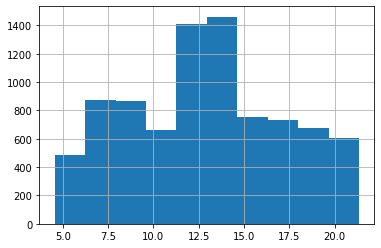

In [ ]:
import matplotlib.pyplot as plt
df5['Item_Weight'].hist()
plt.show()

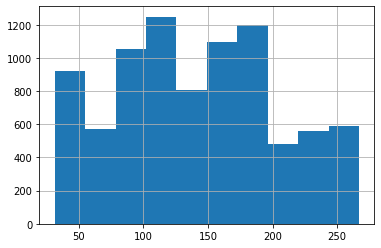

In [ ]:
df5['Item_MRP'].hist()

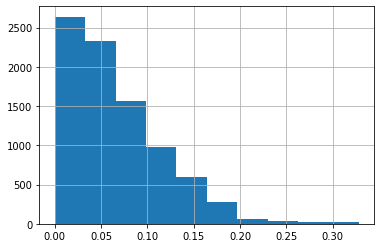

In [ ]:
df5['Item_Visibility'].hist()

In [ ]:
df5.shape

(8523, 12)

In [ ]:
print(df5['Item_Visibility'].mean())
print(df5['Item_Visibility'].min())
print(df5['Item_Visibility'].max())

0.06613202877895111
0.0
0.328390948


In [ ]:
m = df5['Item_Visibility'].mean() 
s = df5['Item_Visibility'].std()

In [ ]:
df6 = df5[(df5['Item_Visibility'] >= (m - 2*s)) & (df5['Item_Visibility'] <= (m + 2*s))]

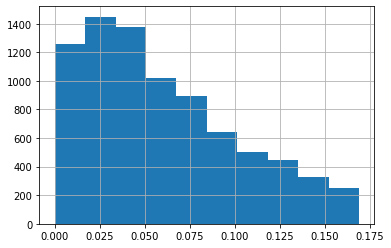

In [ ]:
df6['Item_Visibility'].hist()

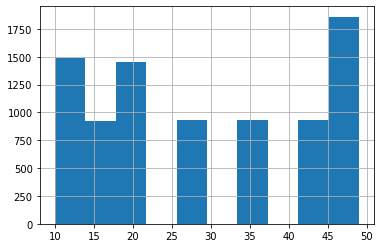

In [ ]:
df5['Outlet_Identifier'].hist()

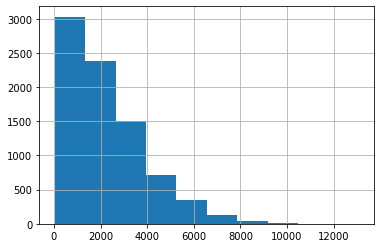

In [ ]:
df6['Item_Outlet_Sales'].hist()

In [ ]:
df6.shape

(8155, 12)

In [ ]:
m = df6['Item_Outlet_Sales'].mean()
s = df6['Item_Outlet_Sales'].std()

In [ ]:
df7 = df6[(df6['Item_Outlet_Sales'] >= (m - 2*s)) & (df6['Item_Outlet_Sales'] <= (m + 2*s))]

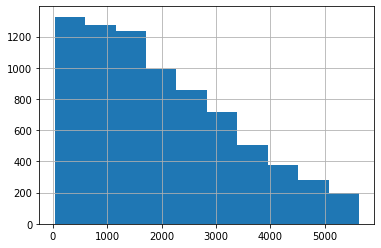

In [ ]:
df7['Item_Outlet_Sales'].hist()

In [ ]:
X = df7.drop('Item_Outlet_Sales',axis='columns')
Y = df7[['Item_Outlet_Sales']]

In [ ]:
X.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier       float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Age                       int64
dtype: object

In [ ]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,FD,9.300,LF,0.016047,Dairy,249.8092,49.0,Medium,Tier 1,Supermarket Type1,22
1,DR,5.920,reg,0.019278,Soft Drinks,48.2692,18.0,Medium,Tier 3,Supermarket Type2,12
2,FD,17.500,LF,0.016760,Meat,141.6180,49.0,Medium,Tier 1,Supermarket Type1,22
3,FD,10.395,reg,0.000000,Baking Goods,51.4008,18.0,Medium,Tier 3,Supermarket Type2,12
4,FD,13.650,reg,0.012741,Snack Foods,57.6588,13.0,High,Tier 3,Supermarket Type1,34


In [ ]:
df_identifier = pd.get_dummies(X['Item_Identifier'])
df_fats = pd.get_dummies(X['Item_Fat_Content'])
df_types = pd.get_dummies(X['Item_Type'])
df_sizes = pd.get_dummies(X['Outlet_Size'])
df_outlet_location = pd.get_dummies(X['Outlet_Location_Type'])
df_outlet_type = pd.get_dummies(X['Outlet_Type'])

In [ ]:
Xt = pd.concat((X,df_identifier,df_fats,df_types,df_sizes,df_outlet_location,df_outlet_type),axis='columns')

In [ ]:
Xt = Xt.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis='columns')

In [ ]:
Xt.dtypes

Item_Weight              float64
Item_Visibility          float64
Item_MRP                 float64
Outlet_Identifier        float64
Age                        int64
DR                         uint8
FD                         uint8
NC                         uint8
LF                         uint8
NE                         uint8
reg                        uint8
Baking Goods               uint8
Breads                     uint8
Breakfast                  uint8
Canned                     uint8
Dairy                      uint8
Frozen Foods               uint8
Fruits and Vegetables      uint8
Hard Drinks                uint8
Health and Hygiene         uint8
Household                  uint8
Meat                       uint8
Others                     uint8
Seafood                    uint8
Snack Foods                uint8
Soft Drinks                uint8
Starchy Foods              uint8
High                       uint8
Medium                     uint8
Small                      uint8
Tier 1    

In [ ]:
#from sklearn.preprocessing import StandardScaler
#std = StandardScaler().fit(Xt)
#Xts = std.transform(Xt)

In [ ]:
Xt.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Age,DR,FD,NC,LF,NE,reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0.016047,249.8092,49.0,22,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,18.0,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,49.0,22,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,10.395,0.000000,51.4008,18.0,12,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,13.650,0.012741,57.6588,13.0,34,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
Y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,556.6088
4,343.5528


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Y)

In [ ]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression(normalize=True)

In [ ]:
lmodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
ytrainPred = lmodel.predict(xtrain)
ytestPred = lmodel.predict(xtest)

In [ ]:
print(abs(ytrain - ytrainPred).mean())
print(abs(ytest - ytestPred).mean())

Item_Outlet_Sales    724.069188
dtype: float64
Item_Outlet_Sales    730.657415
dtype: float64


In [ ]:
print(df7['Item_Outlet_Sales'].mean())
print(df7['Item_Outlet_Sales'].max())
print(df7['Item_Outlet_Sales'].min())

1996.5302488986224
5635.3312
33.29


In [ ]:
import numpy as np
np.hstack((ytest.values,ytestPred))[0:30]

array([[ 328.9052,  700.    ],
       [ 441.4254,  847.5   ],
       [4318.3788, 2908.5   ],
       [1416.8224, 1503.5   ],
       [3691.1952, 2399.    ],
       [2173.1712, 2110.5   ],
       [1249.0408, 2426.5   ],
       [ 577.2486,  880.5   ],
       [1216.4166, 3653.    ],
       [1907.517 , 2099.5   ],
       [ 105.8622,  420.5   ],
       [2302.3364, 2437.5   ],
       [3673.8844, 1949.5   ],
       [ 908.1512, 1531.5   ],
       [3199.8348, 2840.    ],
       [1182.4608, 2333.5   ],
       [ 762.341 ,  320.5   ],
       [ 517.3266, 2590.    ],
       [2311.6576, 2121.5   ],
       [2299.6732, 1714.    ],
       [1544.656 , 2309.    ],
       [ 107.8596,  -94.5   ],
       [ 127.1678,  204.5   ],
       [1222.4088, 1839.    ],
       [2695.1584, 2951.    ],
       [2285.0256, 2830.5   ],
       [4610.665 , 2822.5   ],
       [3412.8908, 1997.5   ],
       [3881.614 , 2643.    ],
       [ 490.0288, 1891.5   ]])

In [ ]:
len(lmodel.coef_)
len(xtrain.columns)

37

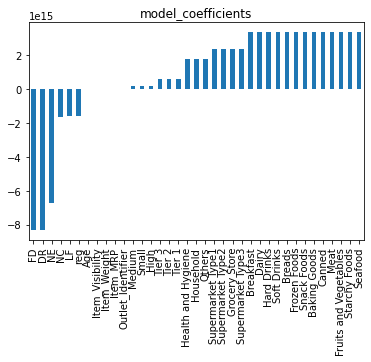

In [ ]:
coef = pd.Series(lmodel.coef_.reshape(-1,1).ravel(),xtrain.columns).sort_values()
coef.plot(kind='bar',title = 'model_coefficients')

#Make Prediction

In [ ]:
xtrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Age,DR,FD,NC,LF,NE,reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
230,6.695,0.033936,221.9456,35.0,17,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
4609,11.850,0.078576,78.4670,19.0,36,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0
7900,10.100,0.089689,225.5088,10.0,23,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
6597,18.700,0.014676,50.8324,17.0,14,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1106,11.500,0.072821,191.2530,13.0,34,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
input = np.zeros(len(xtrain.columns))
input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
i_weight = 13.35
i_vis = 0.032180 	
i_mrp = 61.22
o_ide = 46.0
o_age = 24

i_cat = 'FD'
i_fat = 'LF'
i_type = 'Meat'
o_size = 'Small'
o_city = 'Tier 1'
o_type = 'Supermarket Type1'

index_i_cat = np.where(xtrain.columns == i_cat)[0][0]
index_i_fat = np.where(xtrain.columns == i_fat)[0][0]
index_i_type = np.where(xtrain.columns == i_type)[0][0]
index_o_size = np.where(xtrain.columns == o_size)[0][0]
index_o_city = np.where(xtrain.columns == o_city)[0][0]
index_o_type = np.where(xtrain.columns == o_type)[0][0]

In [ ]:
input[0] = i_weight
input[1] = i_vis
input[2] = i_mrp
input[3] = o_ide
input[4] = o_age

input[index_i_cat] = 1
input[index_i_fat] = 1
input[index_i_type] = 1
input[index_o_size] = 1
input[index_o_city] = 1
input[index_o_type] = 1

In [ ]:
input

array([1.335e+01, 3.218e-02, 6.122e+01, 4.600e+01, 2.400e+01, 0.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00])

In [ ]:
print(lmodel.predict([input]))

[[1198.5]]


In [ ]:
def predict_sales(i_weight,i_vis,i_mrp,o_ide,o_age,i_cat,i_fat,i_type,o_size,o_city,o_type):
  
  input = np.zeros(len(xtrain.columns))
  
  index_i_cat = np.where(xtrain.columns == i_cat)[0][0]
  index_i_fat = np.where(xtrain.columns == i_fat)[0][0]
  index_i_type = np.where(xtrain.columns == i_type)[0][0]
  index_o_size = np.where(xtrain.columns == o_size)[0][0]
  index_o_city = np.where(xtrain.columns == o_city)[0][0]
  index_o_type = np.where(xtrain.columns == o_type)[0][0]

  input[0] = i_weight
  input[1] = i_vis
  input[2] = i_mrp
  input[3] = o_ide
  input[4] = o_age

  input[index_i_cat] = 1
  input[index_i_fat] = 1
  input[index_i_type] = 1
  input[index_o_size] = 1
  input[index_o_city] = 1
  input[index_o_type] = 1

  return lmodel.predict([input])

In [ ]:
predict_sales(13.22,0.099747,75.2328,27.0,36,'FD','LF','Snack Foods','High','Tier 3','Supermarket Type3')

array([[25685.]])

In [ ]:
xtrain.tail(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Age,DR,FD,NC,LF,NE,reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
7443,6.615,0.092158,251.1408,45.0,19,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
5039,14.600,0.059394,181.7976,35.0,17,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1576,12.150,0.025843,119.8440,13.0,34,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
739,6.780,0.000000,227.5694,49.0,22,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
8153,18.200,0.097865,221.8456,10.0,23,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(xtest)

1941

In [ ]:
xtest[ytestPred < 0]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Age,DR,FD,NC,LF,NE,reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
7053,6.385,0.140328,109.1596,10.0,23,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4248,13.220,0.054364,105.0990,19.0,36,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
7305,8.775,0.036160,110.7228,10.0,23,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
7041,20.100,0.124911,109.6228,10.0,23,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3929,12.770,0.057870,49.7008,19.0,36,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,13.430,0.131210,74.0354,19.0,36,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
6116,5.925,0.161467,45.5086,10.0,23,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
6991,6.320,0.021287,38.5822,10.0,23,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
5919,13.140,0.053148,36.3874,19.0,36,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0


In [ ]:
import pickle
with open('big_mart.pickle','wb') as f:
  pickle.dump(lmodel,f)

In [ ]:
import json
cols = []
for col in Xt.columns:
  cols.append(col.lower())

columns = {'data-columns':cols}

with open("columns.json","w") as f:
  f.write(json.dumps(columns))